# Band Gap Exercise

*Authors: Community*

In this notebook, we will look at the correlation between predicted band gap and predicted color for a stacked model and an unstacked model. We will do so by making predictions for a number of materials candidates from the OQMD dataset.

## Background knowledge
None.

## Learning outcomes
By the end of this tutorial, you will learn:
* How to get data from Citrination through queries
* How to make predictions using existing views
* How to plot predictions using `matplotlib`

## Imports

In [2]:
%matplotlib inline

# Standard packages
import os

# Third-party packages
from citrination_client import *
from pypif.obj import *
import numpy as np
import matplotlib.pyplot as plt

## Step 1: Set environment variable with API key
You API key can be found by going to https://citrination.com, clicking on your name in the top right, and clicking on "Account Settings." Treat this API key as confidential, since it allows access to your site.

You can set an environment variable by typing in the command line: `export CITRINATION_API_KEY=__your_api_key__`

Once that environment variable is set, you can create a new client with the following Python code:

In [2]:
client = CitrinationClient(os.environ[CITRINATION_API_KEY], 'https://citrination.com')

## Step 2: Get test candidates from the OQMD dataset

We want to get some materials candidates to make predictions on. We will take some from the OQMD dataset.

In [3]:
# Specify data set ID
dataset_id = 5

# Build query 
search_result = client.pif_search(PifSystemReturningQuery(
            size=200,
            query=DataQuery(
                dataset=DatasetQuery(
                    id=Filter(equal=dataset_id)
                ),
                system=PifSystemQuery(
                    chemical_formula=ChemicalFieldQuery(
                        extract_as="formula")))))


num_hits = search_result.total_num_hits
print "Number of hits:", num_hits
dataset = [d.extracted for d in search_result.hits]

Number of hits: 35952


## Step 3: Make predictions using the stacked and unstacked models

In [5]:
# Unstacked
view_id = "5"  # Change this ID to match the ID of the unstacked view you created
response = client.predict(view_id, dataset)['candidates']
bandgap_unstacked = np.asarray([r['Property Band gap'][0] for r in response])
color_unstacked = np.asarray([r['Property Color'][0] for r in response])

# Stacked
view_id = "6"  # Change this ID to match the ID of the stacked view you created
response = client.predict(view_id, dataset)['candidates']
bandgap_stacked = np.asarray([r['Property Band gap'][0] for r in response])
color_stacked = np.asarray([r['Property Color'][0] for r in response])

## Step 4: Plot predictions

/Applications/anaconda2/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Applications/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


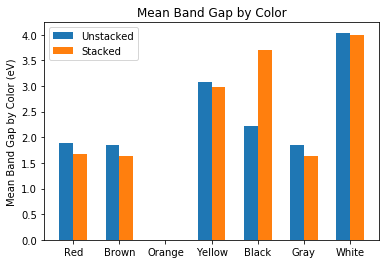

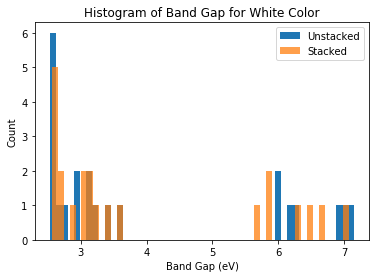

In [6]:
colors = ["Red", "Brown", "Orange", "Yellow", "Black", "Gray", "White"]
num_colors = len(colors)
mean_bandgap_stacked = np.zeros((num_colors))
mean_bandgap_unstacked = np.zeros((num_colors))
for i, color in enumerate(colors):
    mean_bandgap_stacked[i] = np.mean(bandgap_stacked[color_stacked==color])
    mean_bandgap_unstacked[i] = np.mean(bandgap_unstacked[color_unstacked==color])

plt.figure()
idx = np.arange(num_colors)
width=0.3
plt.bar(idx, mean_bandgap_unstacked, width=width, label='Unstacked')
plt.bar(idx + width, mean_bandgap_stacked, width=width, label='Stacked')
plt.xticks(idx + width / 2, colors)
plt.ylabel('Mean Band Gap by Color (eV)')
plt.title('Mean Band Gap by Color')
plt.legend()

plt.figure()
plt.hist(bandgap_unstacked[color_unstacked=="White"], 50)
plt.hist(bandgap_stacked[color_stacked=="White"], 50, alpha=.75)
plt.xlabel('Band Gap (eV)')
plt.ylabel('Count')
plt.title('Histogram of Band Gap for White Color')
plt.legend(['Unstacked', 'Stacked'])

## Conclusion
To recap, this notebook went through how to initialize the Python Citrination Client and write a query to obtain data from Citrination. Using this data, we then made predictions with (pre-built) stacked and unstacked models and compared their performance in plots. 